Задание

Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и[ Google Drive](https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU).


Очистите его, оставив только русские буквы и символы пробела.


Постройте матрицу переходных вероятностей.


Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».


Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.


Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 7.2 MB/s 


In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline
sns.set()
     

Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.

Очистите его, оставив только русские буквы и символы пробела.

In [ ]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]',' ', text)

Постройте матрицу переходных вероятностей.

In [ ]:
russian = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))

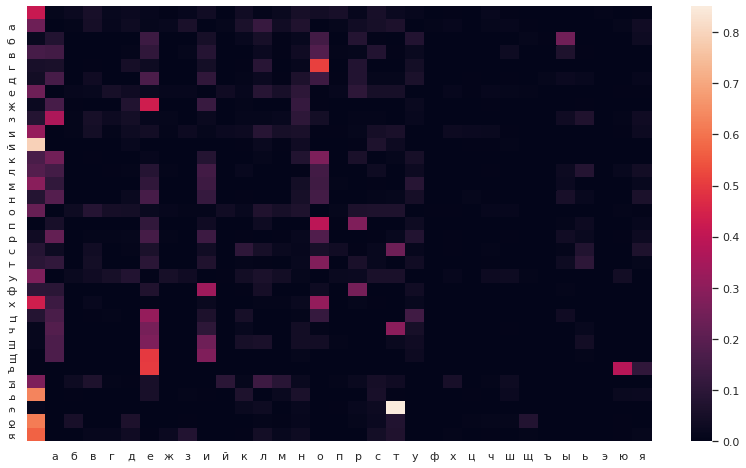

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()
     

Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [ ]:
start = POS['п']
end = POS['р']
result =0
count = 0
prior = 1. / len(russian)
for c in russian[1:]:
  for d in russian[1:]:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end] 
    if proba > 0:
        result += proba
        count += 1

print(f'Вероятность слова из 4 букв {result}, всего вариантов слов {count}')  

Вероятность слова из 4 букв 0.0008512988379402289, всего вариантов слов 426


Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [ ]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

быегобыйс


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [ ]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']
values = series.values.reshape(-1,1)
     

for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6343895195346
3 -786.8405695980803
4 -780.3787398203132
5 -771.8298502247743
6 -754.9110756988266
7 -723.0268437874753
8 -715.2983996552667
9 -731.2049607733225


10 -722.9704681445855
11 -727.1462255860343


12 -722.9828598988597
13 -683.0141534056255


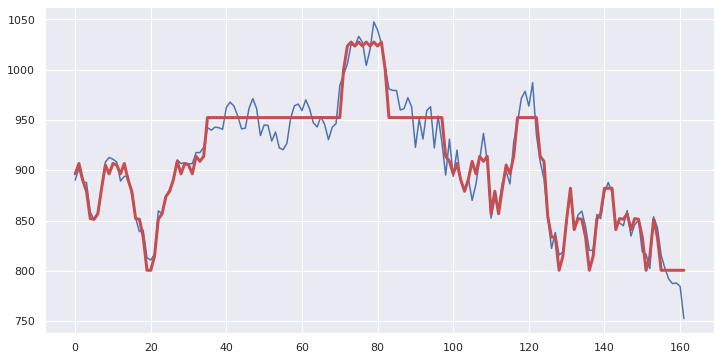

In [ ]:
model = GaussianHMM(n_components=22,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, c='r')

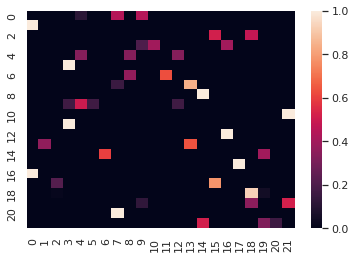

In [ ]:
sns.heatmap(model.transmat_)

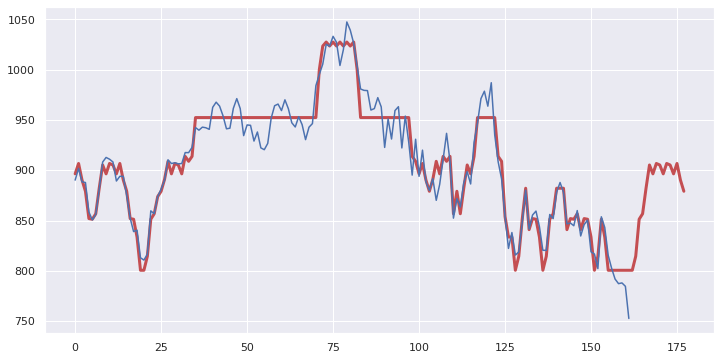

In [ ]:
n = 16
prognos = means
last_label = labels[-1]
for i in range(n):
  last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
  prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(prognos, linewidth=3, c='r')
plt.plot(values)  

Добрый день, Алексей, спасибо за выполненную работу!
Всё хорошо, только сгенерировали слово из 9 букв вместо 8, нужно
for i in range(length-1): так как у вас первая буква уже задана.
Зачёт, успехов в дальнейшем обучении!